In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import scipy

In [2]:
PARENT_PATH = os.path.dirname(os.getcwd())
PREPROCESSED_DATA_PATH = os.path.join(PARENT_PATH, 'Data-Collected','Preprocessed-Data','CSV-Files','sample-02.csv')
OUTPUT_PATH = os.path.join(PARENT_PATH, 'Data-Visualization','Outputs')


In [3]:
df = pd.read_csv(PREPROCESSED_DATA_PATH)
df = df[["Temp In","Temp Out","Hum In","Hum Out"]]
df.head()

,Temp In,Temp Out,Hum In,Hum Out
0,31.87,30.91,79.99,75.92
1,31.94,30.32,78.35,79.33
2,32.02,30.04,78.34,80.69
3,31.60,29.77,78.62,80.15
4,31.99,29.69,80.20,81.93


In [4]:
df.describe()

,Temp In,Temp Out,Hum In,Hum Out
count,181.000000,181.000000,181.000000,181.000000
mean,31.399945,27.256354,85.687901,96.964751
std,0.618184,0.969413,2.957603,5.107641
min,29.230000,26.140000,78.340000,75.920000
25%,31.000000,26.560000,84.300000,96.590000
50%,31.300000,26.900000,86.750000,99.740000
75%,31.870000,27.900000,87.730000,100.000000
max,32.550000,30.910000,89.830000,100.000000


In [5]:
temperature_df = df[["Temp In","Temp Out"]]
humidity_df = df[["Hum In","Hum Out"]]

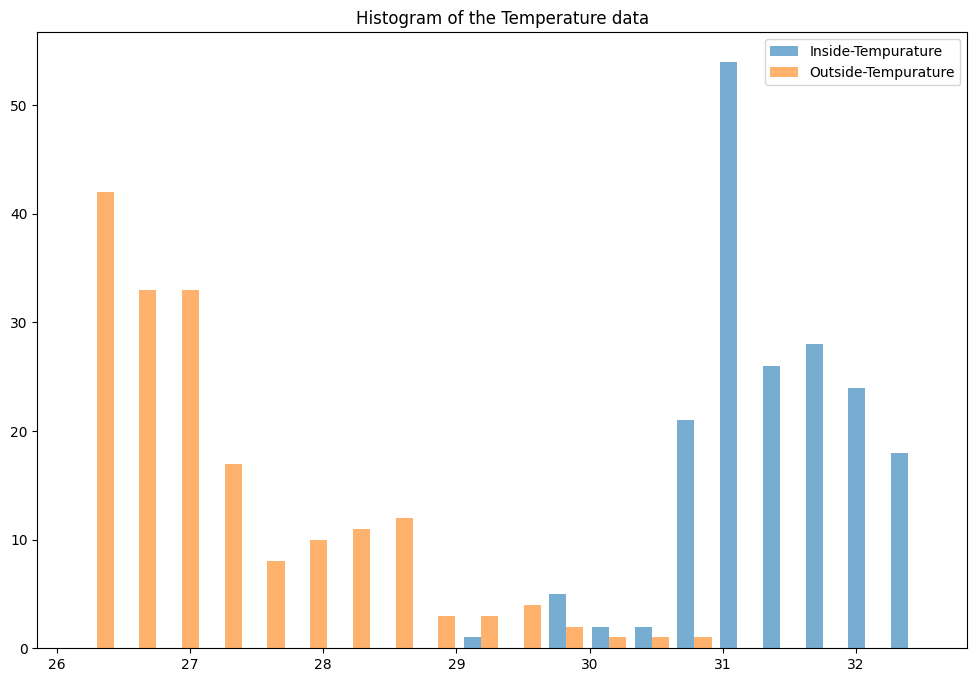

In [6]:

plt.figure(figsize=(12, 8))
plt.title('Histogram of the Temperature data')
plt.hist(temperature_df.values, bins=20, alpha=0.6, label=['Inside-Tempurature', 'Outside-Tempurature'])
plt.legend(loc='upper right')
plt.savefig(os.path.join(OUTPUT_PATH, 'Temperature-Histogram.png'), dpi=300)
plt.show()

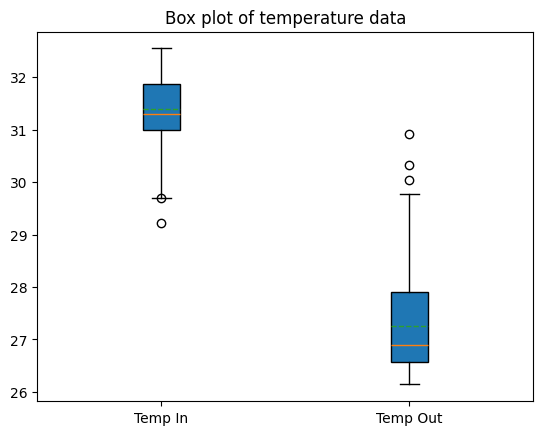

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Box plot of temperature data')
plt.boxplot(temperature_df.values, tick_labels=temperature_df.columns, showmeans=True, meanline=True, patch_artist=True)
plt.savefig(OUTPUT_PATH + "/Temp-Box-Plot.png",dpi=300)
plt.show()


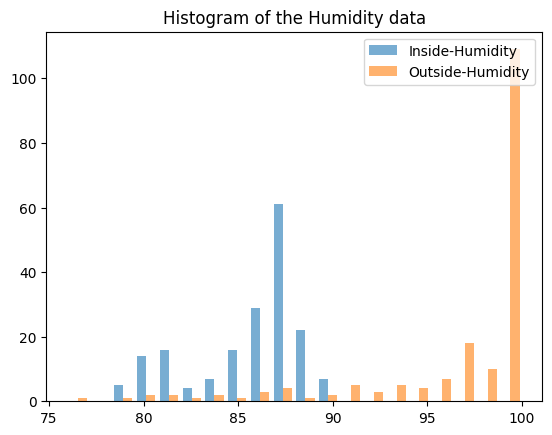

In [57]:
plt.title('Histogram of the Humidity data')
plt.hist(humidity_df.values, bins=20, alpha=0.6, label=['Inside-Humidity', 'Outside-Humidity'])
plt.legend(loc='upper right')
plt.savefig(os.path.join(OUTPUT_PATH, 'Humidity-Histogram.png'), dpi=300)
plt.show()

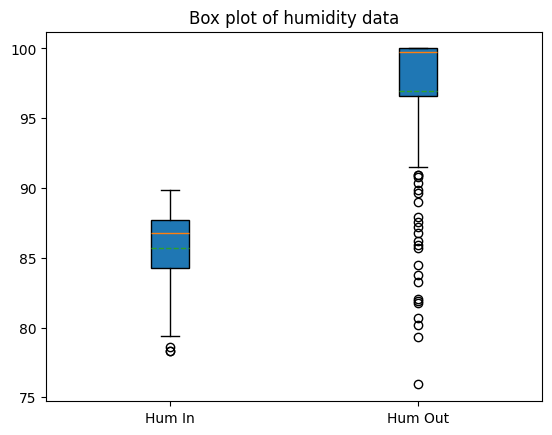

In [58]:
plt.title('Box plot of humidity data')
plt.boxplot(humidity_df.values, tick_labels=humidity_df.columns, showmeans=True, meanline=True, patch_artist=True)
plt.savefig(OUTPUT_PATH + "/Humidity-Box-Plot.png",dpi=300)
plt.show()

In [59]:
AUDIO_DATA_DIR = os.path.join(PARENT_PATH, 'Data-Collected','Raw-Data','Sample-03')
list_of_files = os.listdir(AUDIO_DATA_DIR)
text_files = [file for file in list_of_files if file.endswith('.txt')]
rms_values = []
for file in text_files:
    file_path = os.path.join(AUDIO_DATA_DIR, file)
    data = None
    with open(file_path, 'r') as f:
        data = f.read()
        data = data.split('\n')[1].strip(",").split(',')
        data = data[:8000]
        data = np.array(data, dtype=np.float32)
        fft_result = np.fft.fft(data)
        fft_magnitude = np.abs(fft_result)  # Get the magnitude
        N = len(data)  # Number of samples
        freqs = np.fft.fftfreq(N, 1 / 8000)  # Frequency axis
        f_min = 100  # Example minimum frequency (Hz)
        f_max = 300  # Example maximum frequency (Hz)
        indices = np.where((freqs >= f_min) & (freqs <= f_max))
        amplitude_in_range = np.sum(fft_magnitude[indices])
        rms = np.mean(fft_magnitude[indices])
        rms_values.append(rms/50000)

ValueError: x and y must have same first dimension, but have shapes (181,) and (498,)

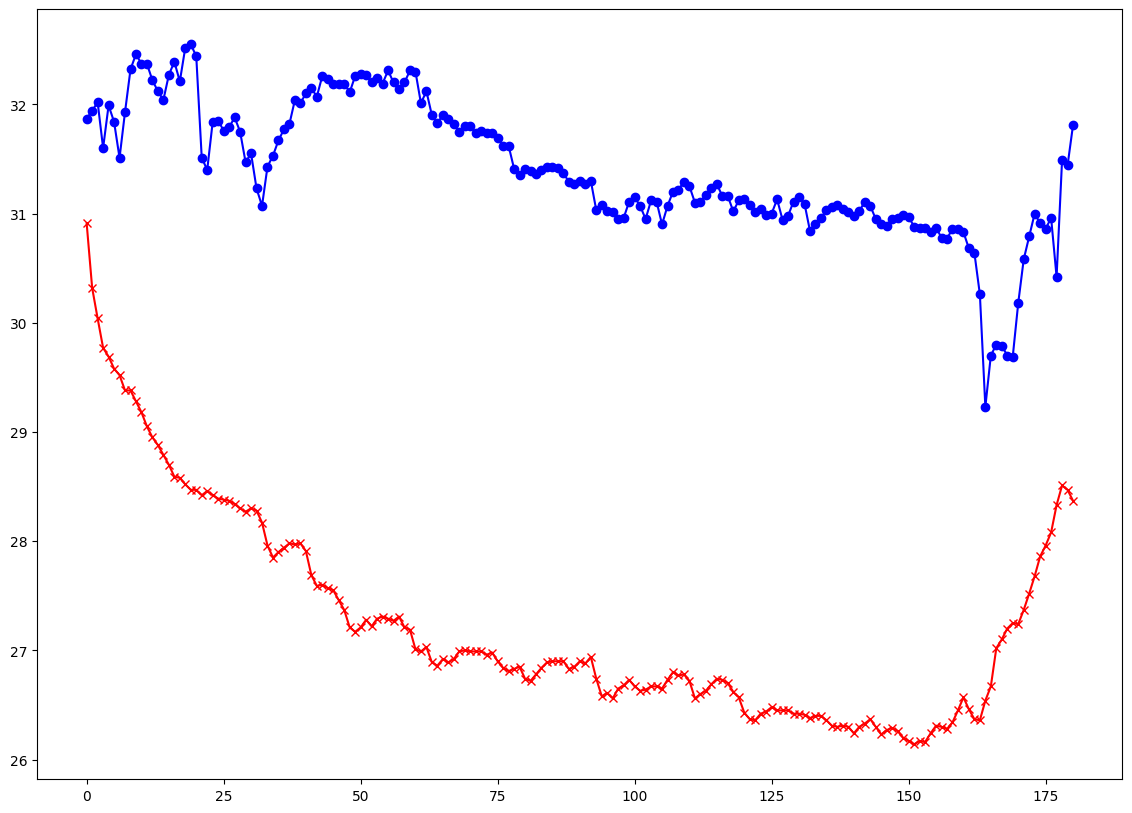

In [60]:
# Set up the figure for plotting
plt.figure(figsize=(14, 10))

plt.plot(df.index, df["Temp In"], label='Inside Temperature', color='blue', marker='o')
plt.plot(df.index, df["Temp Out"], label='Outside Temperature', color='red', marker='x')
plt.plot(df.index, rms_values, label='RMS Values', color='green', marker='s')
plt.title('Inside vs Outside')
plt.xlabel('Samples')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.savefig(OUTPUT_PATH + "/Inside-Outside-Temperature.png",dpi=300)
plt.show()

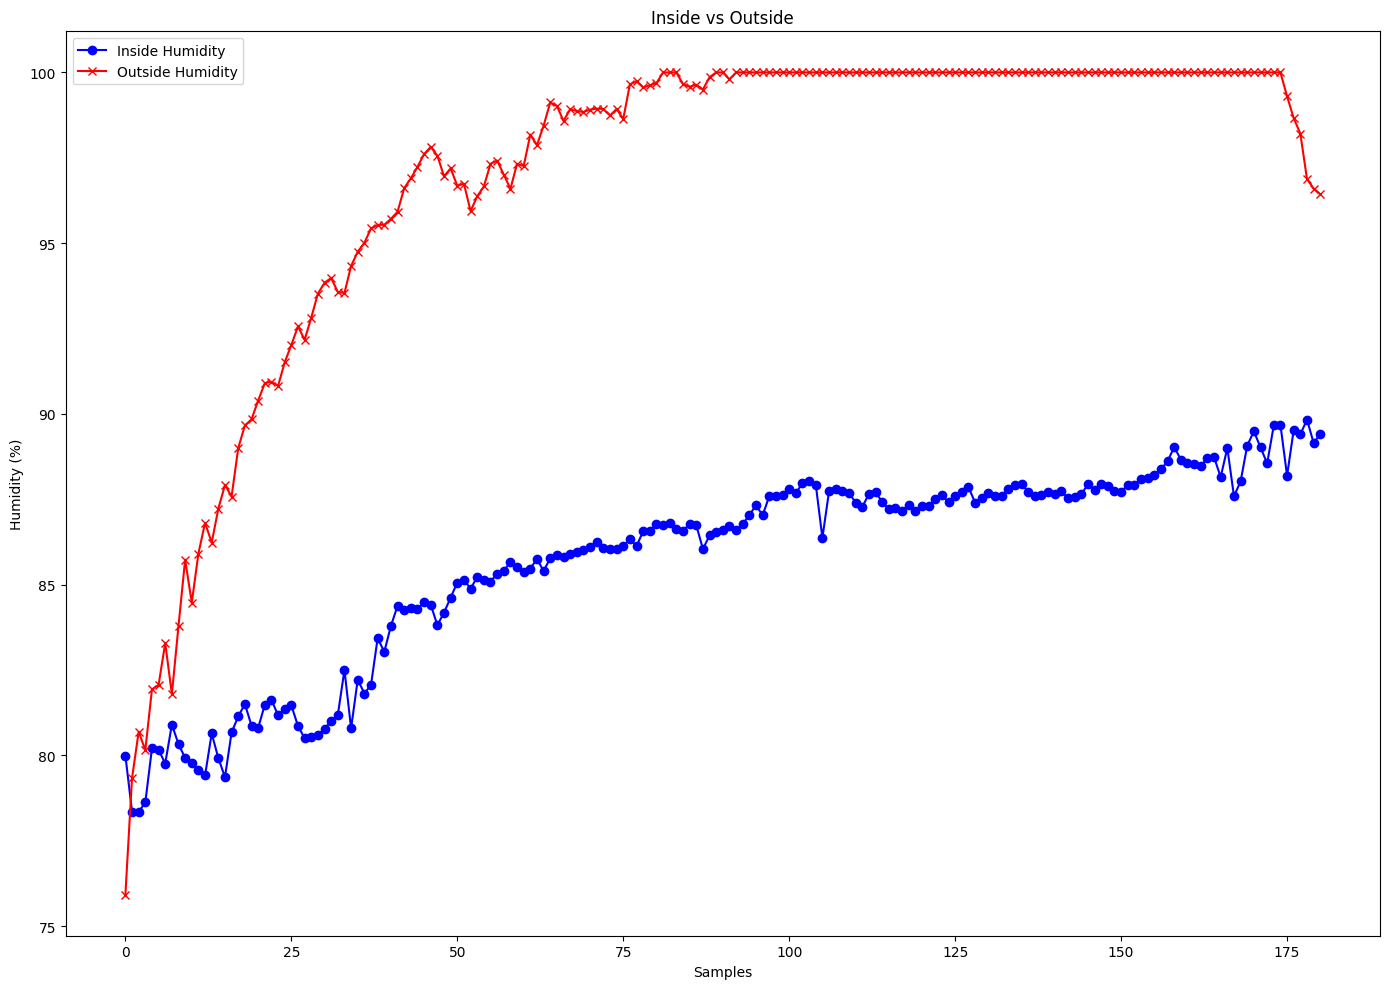

In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(df.index, df['Hum In'], label='Inside Humidity', color='blue', marker='o')
plt.plot(df.index, df['Hum Out'], label='Outside Humidity', color='red', marker='x')
plt.title('Inside vs Outside')
plt.xlabel('Samples')
plt.ylabel('Humidity (%)')
plt.legend()
plt.tight_layout()
plt.savefig(OUTPUT_PATH + "/Inside-Outside-Humidity.png",dpi=300)
plt.show()